In [53]:
###### This module introduces the files ...
import nltk
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.text import Text  
import pandas as pd
import numpy as np
import glob, os
from os import listdir







import re
def is_digit(word):
    try:
        int(word)
        return True
    except ValueError:
        return False

cedilla2latin = [[u'Á', u'A'], [u'á', u'a'], [u'Č', u'C'], [u'č', u'c'], [u'Š', u'S'], [u'š', u's']]
tr = dict([(a[0], a[1]) for (a) in cedilla2latin])

# Now only lowercase and special characters remain. As lowercase only supports Latin letters, the special 
#characters need to be turned to Latin. This can be done using Transliterate Python package.
def transliterate(line):
    new_line = ""
    for letter in line:
        if letter in tr:
            new_line += tr[letter]
        else:
            new_line += letter
    return new_line







#This line of code will read in all the artist to choose from
x=os.listdir("/Users/benjamingarlington/Desktop/AI_research_group_project/Song_Lyrics")
print("Here is a list of the Generes to choose from..")
a=1
genere_list=[]
while(a<len(x)):
    for i in x:
        if i == '.DS_Store':
            i = ''
            continue
        
        print(a,":\t",i)
        genere_list.append(i)
        a=a+1
    
#This block of code asks the user to choose which genere the lyrics will come from
x = input("\nPlease type in the number of your Genere and press 'Enter': ")
x=int(x)
genere = genere_list[x-1]
y=os.listdir("/Users/benjamingarlington/Desktop/AI_research_group_project/Song_Lyrics/%s" %genere)
print("Here is a list of the Artist to choose from..")
a=1
artist_list=[]
while(a<len(y)):
    for i in y:
        if i == '.DS_Store':
            i = ''
            continue
        
        print(a,":\t",i)
        artist_list.append(i)
        a=a+1
    
#This block of code asks the user to choose which artist the lyrics will come from
x = input("\n\nPlease type the number for your Artist and press 'Enter': ")
x=int(x)
filename = artist_list[x-1]
z=os.listdir("/Users/benjamingarlington/Desktop/AI_research_group_project/Song_Lyrics/%s/%s" %(genere,filename))
a=1
lyrics_list=[]
while(a<len(z)):
    for i in z:
        if i == '.DS_Store':
            i = ''
            continue
        
        print(a,":\t",i)
        lyrics_list.append(i)
        a=a+1

    
#This block of code will ask the user to choose which song lyrics to ananlyze and clean
x = input("\nHello, user. Please type in the number of your song and press 'Enter': ")
x = int(x)
song = lyrics_list[x-1]

Here is a list of the Generes to choose from..
1 :	 Pop
2 :	 Metal
3 :	 Christian
4 :	 Classic Rock
5 :	 Country
6 :	 Rap

Please type in the number of your Genere and press 'Enter': 3
Here is a list of the Artist to choose from..
1 :	 Chris_Tomlin
2 :	 Mathew_West
3 :	 Brandon_Heath


Please type the number for your Artist and press 'Enter': 2
1 :	 MWgracewins.txt
2 :	 MWbrokenthings.txt
3 :	 MWforgiveness.txt
4 :	 MWwearebroken.txt
5 :	 MWstrongenough.txt

Hello, user. Please type in the number of your song and press 'Enter': 3


In [54]:
#This module produces the raw ouput from the chosen file..
file = open("/Users/benjamingarlington/Desktop/AI_research_group_project/Song_Lyrics/%s/%s/%s"%(genere,filename,song))


for i in range(10):
    print(file.readline())

 

Itâs the hardest thing to give away

And the last thing on your mind today

It always goes to those who donât deserve

Itâs the opposite of how you feel

When they pain they caused is just too real

Takes everything you have to say the word

Forgiveness, forgiveness

It flies in the face of all your pride

It moves away the mad inside

Itâs always angerâs own worst enemy



In [56]:
#This module takes the chosen file and cleans the txt, then is writen to an output file called cleandata.txt..
file = open("/Users/benjamingarlington/Desktop/AI_research_group_project/Song_Lyrics/%s/%s/%s"%(genere,filename,song), encoding='latin-1')
outfile = open('cleandata.txt','w')


for line in file:
    line = line.replace('+', ' ').replace('[', ' ').replace(']', ' ').replace('*', ' ').replace('(', ' ').replace(')', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ').replace('\'', '').replace('-', ' ').replace('\"', ' ').replace('!', ' ').replace('?', ' ')
    # remove digits with regex
    line = re.sub("(^|\W)\d+($|\W)", " ", line)
    # OR remove digits with casting to int
    new_line = []
    for word in line.split():
        if not is_digit(word):
            new_line.append(word)
    line = " ".join(new_line)

    # transliterate to Latin characters
    line = transliterate(line)
    line = line.lower()
    outfile.write(line + '\n')
    

    


In [57]:
lyrics = open('cleandata.txt','r')

allbadwords = ['damn', 'stupid', 'shit','darnit', 'dumb', 'ass', 'fat load', 'cum', 'sperm', 'ass', 'butt', 'butthole', 'penis',
          'vagina', 'pussy', 'dick','fuck', 'fucking','fuck buttons','shit','anal','sodomize','sodomy','rape','raping','date rape','daterape',
            'slut','nigger','camslut','camwhore','wetback','clusterfuck','faggot','nig nog','muhfuckas', 'muhfucka', 'niggas'] 

badwords1=['damn', 'stupid', 'darnit', 'hell', 'dumb', 'fat load', 'cum', 'sperm', 'ass', 'butt', 'butthole', 'penis',
          'vagina', 'pussy', 'dick']

badwords2 = ['fuck', 'fucking','fuck buttons','shit','anal','sodomize','sodomy','rape','raping','date rape','daterape',
            'slut','nigger','camslut','camwhore','wetback','clusterfuck','faggot','nig nog', 'muhfuckas', 'muhfucka', 'niggas']


    
def G_classification(allbadwords, lyrics):
    listof_ABW = allbadwords
    
    file = lyrics
    count = 0  
   
    for line in file:
        for word in line.split():
            for i in listof_ABW:
                if word == i:
                    count = count +1
    return count 


def R_classification(badwords2, lyrics):
    listof_ABW2 = badwords2
    R_BW_said = []
    file = lyrics
    
    for line in file:
        for word in line.split():
            for i in listof_ABW2:
                if word == i:
                    R_BW_said.append(word)
    return R_BW_said
                    
                    


def PG13_classification (badwords1, badwords2, lyrics):
    PG13_BW = badwords1
    R_BW = badwords2
    
    file = lyrics
    file2 = lyrics
    
    for line in file:
        for word in line.split():
            for i in R_BW:
                if word == i:
                    return False
                    break
    for line in file2:
        for word in line.split():        
            for i in PG13_BW:
                if word == i:
                    return True
                    break

#----------------------------------Bad Word Count---------------------------------------

def totalwords(lyrics):
    file = lyrics
    count = 0  

    for line in file:
        for word in line.split():
                count = count +1
    return count 



def Bwtotal(allbadwords, lyrics):
        listof_ABW = allbadwords

        file = lyrics
        count = 0  

        for line in file:
            for word in line.split():
                for i in listof_ABW:
                    if word == i:
                        count = count +1
        return count 
    

    
def rcount(badwords2, lyrics = open('cleandata.txt','r')):
        BW2 = badwords2            
        file = lyrics
        r_count = 0  

        for line in file:
                for word in line.split():
                    for i in BW2:
                        if word == i:
#                             print (word)
                            r_count = r_count +1
                            
        return r_count
    
#print (rcount(badwords2, lyrics =  open('cleandata.txt','r')))
            
def pg13count(badwords1, lyrics = open('cleandata.txt','r')):
        BW1 = badwords1
        file = lyrics
        pg13_count = 0  

        for line in file:
                for word in line.split():
                    for i in BW1:
                        if word == i:
                            pg13_count = pg13_count +1
        return pg13_count
    
#print (pg13count(badwords1, lyrics =  open('cleandata.txt','r')))

#-----------Calculating Bad Word Percentage------------



def PG13_percentage ():
    pg13 = pg13count(badwords1, lyrics = open('cleandata.txt','r'))
    total = totalwords(lyrics = open('cleandata.txt','r'))
     
    percent = (pg13/total) 
    
    percentage = (percent * 100) 
    
    return round(percentage,4) 

def R_percentage ():
    r = rcount(badwords2,lyrics = open('cleandata.txt','r') )
    total = totalwords(lyrics = open('cleandata.txt','r'))
     
    percent = (r/total) 
    
    percentage = (percent * 100) 
    
    return round(percentage,4)           

                              
                   
#------------------FORM--------------------------------

def READABLE_INFO_FORM ():
    if G_classification(allbadwords,lyrics = open('cleandata.txt','r')) == 0:
        print ("This Song is Classified: G for General Audience")
        print ( "There are a total",totalwords(lyrics = open('cleandata.txt','r')), "words in the lyrics" )

    elif PG13_classification (badwords1,badwords2, lyrics = open('cleandata.txt','r')) == None :
        print ("This Song is Classified: PG13 Parental Guidance if under 13")
        print ( "There are a total",totalwords(lyrics = open('cleandata.txt','r')), "words in the lyrics" )
        print ( "Of those words,",Bwtotal(allbadwords, lyrics = open('cleandata.txt','r')),"are considered bad words" )
        
        #just a test adding both counts
        #print ( "Of those words,", rcount(badwords2, lyrics = open('cleandata.txt','r')) + pg13count(badwords1, lyrics = open('cleandata.txt','r')),"are considered bad words")

        print("This song has a percentage of:",PG13_percentage(), "percent level bad words")
    elif len (R_classification(badwords2, lyrics = open('cleandata.txt','r'))) > 0:
        print ("This song is classified: R Restricted Audience")
        print ( "There are a total",totalwords(lyrics = open('cleandata.txt','r')), "words in the lyrics" )
        print ( "Of those words,",Bwtotal(allbadwords, lyrics = open('cleandata.txt','r')),"are considered bad words" )
        
        #just a test adding both counts
        #print ( "Of those words,", rcount(badwords2, lyrics = open('cleandata.txt','r')) + pg13count(badwords1, lyrics = open('cleandata.txt','r')),"are considered bad words")

        print("This song has a percentage of:",PG13_percentage(),"percent PG13 level bad words")
        print("and has a percentage of:",R_percentage(),"percent R level bad words")     

        
        
        
READABLE_INFO_FORM ()


This Song is Classified: G for General Audience
There are a total 231 words in the lyrics


In [58]:
#CONVERTING TXT FILES TO STRING
with open('cleandata.txt', 'r') as myfile:
    data=myfile.read().replace('\n', ' ')
    print(data)

itâs the hardest thing to give away and the last thing on your mind today it always goes to those who donât deserve itâs the opposite of how you feel when they pain they caused is just too real takes everything you have to say the word forgiveness forgiveness it flies in the face of all your pride it moves away the mad inside itâs always angerâs own worst enemy even when the jury and the judge say youâve got a right to hold a grudge itâs the whisper in your ear saying set it free forgiveness forgiveness forgiveness forgiveness show me how to love the unlovable show me how to reach the unreachable help me now to do the impossible forgiveness forgiveness help me now to do the impossible forgiveness itâll clear the bitterness away it can even set a prisoner free there is no end to what its power can do so let it go and be amazed by what you see through eyes of grace the prisoner that it really frees is you forgiveness forgiveness forgiveness forgiveness show me how to love

In [59]:
#USING NLTK WORD TOKENIZATION
tokenized_text = nltk.word_tokenize(data)
# tagged = nltk.pos_tag(tokenized_text)
print(tokenized_text)

['itâ\x80\x99s', 'the', 'hardest', 'thing', 'to', 'give', 'away', 'and', 'the', 'last', 'thing', 'on', 'your', 'mind', 'today', 'it', 'always', 'goes', 'to', 'those', 'who', 'donâ\x80\x99t', 'deserve', 'itâ\x80\x99s', 'the', 'opposite', 'of', 'how', 'you', 'feel', 'when', 'they', 'pain', 'they', 'caused', 'is', 'just', 'too', 'real', 'takes', 'everything', 'you', 'have', 'to', 'say', 'the', 'word', 'forgiveness', 'forgiveness', 'it', 'flies', 'in', 'the', 'face', 'of', 'all', 'your', 'pride', 'it', 'moves', 'away', 'the', 'mad', 'inside', 'itâ\x80\x99s', 'always', 'angerâ\x80\x99s', 'own', 'worst', 'enemy', 'even', 'when', 'the', 'jury', 'and', 'the', 'judge', 'say', 'youâ\x80\x99ve', 'got', 'a', 'right', 'to', 'hold', 'a', 'grudge', 'itâ\x80\x99s', 'the', 'whisper', 'in', 'your', 'ear', 'saying', 'set', 'it', 'free', 'forgiveness', 'forgiveness', 'forgiveness', 'forgiveness', 'show', 'me', 'how', 'to', 'love', 'the', 'unlovable', 'show', 'me', 'how', 'to', 'reach', 'the', 'unreachable

In [60]:
#USING NLTK STOPWORDS
stop_words = set(stopwords.words('english'))
stopped = [word for word in tokenized_text if word not in stopwords.words('english')]
stopped

['itâ\x80\x99s',
 'hardest',
 'thing',
 'give',
 'away',
 'last',
 'thing',
 'mind',
 'today',
 'always',
 'goes',
 'donâ\x80\x99t',
 'deserve',
 'itâ\x80\x99s',
 'opposite',
 'feel',
 'pain',
 'caused',
 'real',
 'takes',
 'everything',
 'say',
 'word',
 'forgiveness',
 'forgiveness',
 'flies',
 'face',
 'pride',
 'moves',
 'away',
 'mad',
 'inside',
 'itâ\x80\x99s',
 'always',
 'angerâ\x80\x99s',
 'worst',
 'enemy',
 'even',
 'jury',
 'judge',
 'say',
 'youâ\x80\x99ve',
 'got',
 'right',
 'hold',
 'grudge',
 'itâ\x80\x99s',
 'whisper',
 'ear',
 'saying',
 'set',
 'free',
 'forgiveness',
 'forgiveness',
 'forgiveness',
 'forgiveness',
 'show',
 'love',
 'unlovable',
 'show',
 'reach',
 'unreachable',
 'help',
 'impossible',
 'forgiveness',
 'forgiveness',
 'help',
 'impossible',
 'forgiveness',
 'itâ\x80\x99ll',
 'clear',
 'bitterness',
 'away',
 'even',
 'set',
 'prisoner',
 'free',
 'end',
 'power',
 'let',
 'go',
 'amazed',
 'see',
 'eyes',
 'grace',
 'prisoner',
 'really',
 'frees

In [61]:
#CONVERTING LIST INTO A STRING
str2 = " ".join(str(x) for x in stopped)
str2

'itâ\x80\x99s hardest thing give away last thing mind today always goes donâ\x80\x99t deserve itâ\x80\x99s opposite feel pain caused real takes everything say word forgiveness forgiveness flies face pride moves away mad inside itâ\x80\x99s always angerâ\x80\x99s worst enemy even jury judge say youâ\x80\x99ve got right hold grudge itâ\x80\x99s whisper ear saying set free forgiveness forgiveness forgiveness forgiveness show love unlovable show reach unreachable help impossible forgiveness forgiveness help impossible forgiveness itâ\x80\x99ll clear bitterness away even set prisoner free end power let go amazed see eyes grace prisoner really frees forgiveness forgiveness forgiveness forgiveness show love unlovable show reach unreachable help impossible forgiveness want finally set free show see mercy sees help give gave forgiveness forgiveness forgiveness forgiveness'

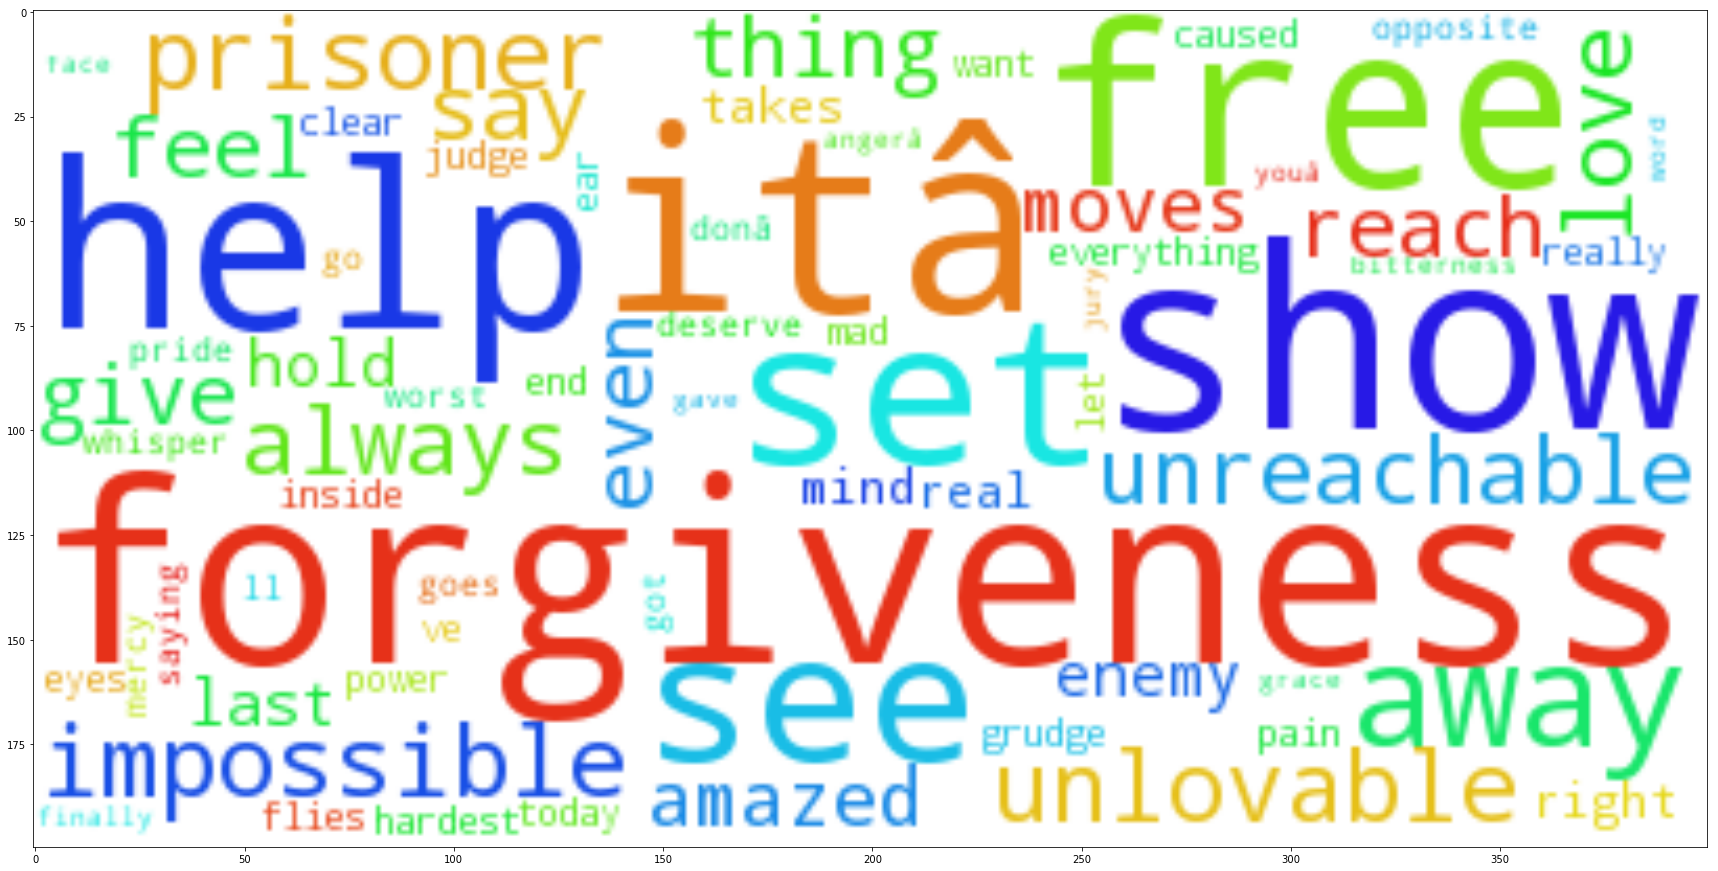

In [62]:
#VISUALIZING USING WORDCLOUD

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(background_color="white", max_font_size=60).generate(str2)
plt.figure(figsize=(30,25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [63]:
#COUNTING NUMBER OF WORDS OCCURED
from collections import Counter
c = Counter(stopped)
vis_data = c.most_common(10)
vis_data

[('forgiveness', 18),
 ('show', 5),
 ('help', 4),
 ('itâ\x80\x99s', 4),
 ('set', 3),
 ('away', 3),
 ('free', 3),
 ('impossible', 3),
 ('prisoner', 2),
 ('unlovable', 2)]

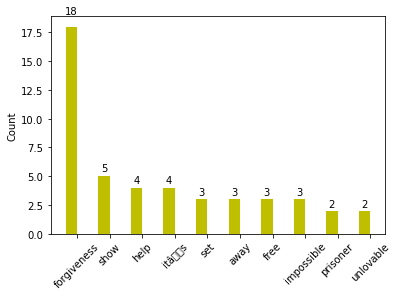

In [64]:
#VISUALIZING MOST FREQUENT WORDS USING COUNTER
import numpy as np
import matplotlib.pyplot as plt


names, values = zip(*vis_data)  # @comment by Matthias
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(vis_data))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, values, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names, rotation = 45)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()